In [2]:
import networkx as nx
import numpy as np
import copy

# Finding number of tritangles in graph

## initialize graph

In [3]:
G = nx.triangular_lattice_graph(2,2)

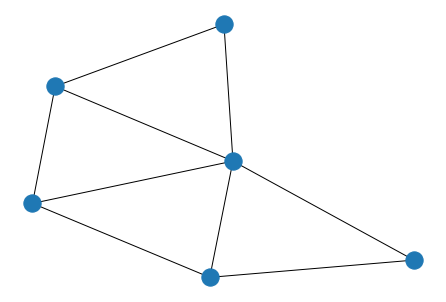

In [6]:
nx.draw(G)

In [12]:
A = nx.to_numpy_array(G)

In [13]:
A

array([[0., 1., 1., 0., 0., 0.],
       [1., 0., 1., 1., 0., 0.],
       [1., 1., 0., 1., 1., 1.],
       [0., 1., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 1., 0.]])

In [14]:
B = np.dot(A,A)
C = np.dot(A,B)
print(C)

[[2. 5. 7. 3. 2. 4.]
 [5. 4. 8. 7. 4. 4.]
 [7. 8. 8. 9. 7. 8.]
 [3. 7. 9. 4. 3. 7.]
 [2. 4. 7. 3. 2. 5.]
 [4. 4. 8. 7. 5. 4.]]


## Stack class def

In [15]:
class Stack(list):
    push = list.append    # Push to Stack
                          # Delete - 내장 pop method
        
    def is_empty(self):   # 데이터가 없는지 확인
        if not self:
            return True
        else:
            return False

    def peek(self):        # 최상단 데이터 확인
        return self[-1]
    
    def clear(self):
        list.clear()
    

## 1. brute force search

In [16]:
s = Stack()
nodenum = len(A[0])

In [17]:
tri_trace = []
for i in range(nodenum):
    s.push(i)
    for j in range(nodenum):
        if A[i][j] == 1:
            s.push(j)
            for k in range(nodenum):
                if A[j][k] == 1:
                    s.push(k)
                    if A[k][i] == 1:
                        #print("Stack is full:", s)
                        s_to_append = copy.deepcopy(s)
                        tri_trace.append(s_to_append)                                       
                    s.pop()
            s.pop()
    s.pop()       

In [28]:
tri_trace

[[0, 1, 2],
 [0, 2, 1],
 [1, 0, 2],
 [1, 2, 0],
 [1, 2, 3],
 [1, 3, 2],
 [2, 0, 1],
 [2, 1, 0],
 [2, 1, 3],
 [2, 3, 1],
 [2, 3, 5],
 [2, 4, 5],
 [2, 5, 3],
 [2, 5, 4],
 [3, 1, 2],
 [3, 2, 1],
 [3, 2, 5],
 [3, 5, 2],
 [4, 2, 5],
 [4, 5, 2],
 [5, 2, 3],
 [5, 2, 4],
 [5, 3, 2],
 [5, 4, 2]]

In [19]:
len(tri_trace)

24

In [50]:
len(tri_trace)/6

4.0